In [0]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as pt
from matplotlib.figure import Figure
import plotly.express as px
import plotly.graph_objects as go
from plotly.tools import mpl_to_plotly

In [0]:
def responsive(figure):
    if isinstance(figure, Figure):
        figure = mpl_to_plotly(figure, strip_style = False)
    figure.layout["autosize"] = True
    figure.layout.pop("width", None)
    figure.layout.pop("height", None)
    return go.FigureWidget(figure)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/isaacdlp/datascience/master/data/ai2020.csv", encoding = "ISO-8859-1")
# df.to_csv("clean.csv", index=False, encoding = "ISO-8859-1")
# df.drop("Focus Area", axis=1, inplace=True)

df.rename({"Round" : "Round Count"}, inplace = True)
df["Industries"] = df["Industries"].str.title()

for field in df:
    print(f"{field}:  {df[field].count()}")

Company:  100
Crunchbase:  96
Industries:  100
Location:  100
Employee Count:  95
Founded Date:  96
Investor Count:  94
Lead Investor Count:  89
Select Investors:  99
Funding:  94
Round:  94


In [0]:
df["Funding"].fillna(0, inplace = True)
df["Funding"] = df["Funding"].str.strip()
df["Funding"] = df["Funding"].str.replace("$", "")
df["Funding"] = df["Funding"].apply(pd.to_numeric)

In [0]:
df[["City","Region", "Country"]] = df["Location"].str.split(",", expand = True)
df["City"] = df["Region"].str.strip()
df["Region"] = df["Region"].str.strip()
df["Country"] = df["Country"].str.strip()

In [6]:
title = "Lead AI Companies per Country"
gr = df.groupby("Country")["Company"].count()
gr.sort_values(ascending = False, inplace = True)
ds = gr.reset_index()
ds.columns = ["Country", "Company Count"]
fig = responsive(px.bar(ds, x = "Country", y = "Company Count", title = title))
fig.show()
#fig.show()

#ax = gr.plot.bar()
#responsive(ax.figure)

This is a **markdown** cell

In [0]:
df.set_index("Company", drop = True, inplace = True)
df["Select Investors"].fillna("None", inplace = True)
ds = pd.DataFrame(df["Select Investors"].str.split(",").tolist(), index = df.index).stack()
ds = ds.reset_index([0, "Company"])
ds.columns = ["Company", "Lead Investor"]
df = pd.merge(left = df, right = ds, left_on = "Company", right_on = "Company")
df.drop("Select Investors", axis = 1, inplace = True)
df["Lead Investor"] = df["Lead Investor"].str.strip()

In [8]:
gr = df.groupby("Lead Investor")["Company"].count()
gr.sort_values(ascending = True, inplace = True)
gr.count()

315

In [9]:
gr = gr[gr > 2]
gr.count()

25

In [10]:
ds = gr.reset_index()
ds.columns = ["Lead Investor", "Company Count"]

#responsive(px.bar(ds, x = "Investor", y = "Company Count", orientation = "h"))

#ax = ds.plot(kind="barh", x = "Investor", y = "Company Count")
#ax.set_ylabel("Companies")
#responsive(ax.figure)

title = "Lead AI Companies per Lead Investor"
fig = go.Figure(go.Bar(
            x = ds["Company Count"].values,
            y = ds["Lead Investor"].values,
            orientation = "h"))
fig.update_layout(
    title = title,
    xaxis_title = "Company Count",
    yaxis_title = "Lead Investor"
)
fig = responsive(fig)
fig.show()

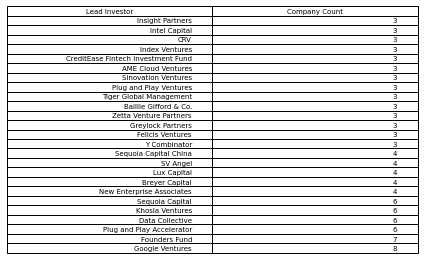

In [11]:
fig, ax = pt.subplots()
# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=ds.values, colLabels=ds.columns, loc='center')
#pd.plotting.table(ax, ds, loc='center')
fig.tight_layout()
pt.show()